eIn the following I will analyse data on the passengers of Titanic. This is one of the many datasets that can be found at the data science platform kaggle (https://www.kaggle.com/c/titanic). Numpy, Pandas, matplotlib and seaborn libraries will be used in this analysis.

Combinations of grouping, data manipulation, aggregation tools and visualization tools will be used in order to answer the following questions:

• What is the number of passengers with more than 3 siblings/spouses (SblSp variable)?

• Visualize the difference in ’Fare’ between males who survived and males who did not survive!

• Define child as somebody who is younger than 14 years. How many children were on the Titanic who travelled alone (0 in columns ’SibSp’ and ’Parch’)?

• How many surviving passengers were on Titanic whose family name starts with the letter ’L’? 

• What was the most common family name among all the passengers? 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import data
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Number of passengers with more than 3 siblings/spouses
titanic_df.SibSp[titanic_df.SibSp > 3].shape[0]

30

(0.0, 100.0)

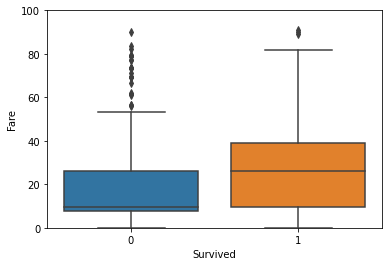

In [8]:
# Vizualising the difference in Fare between surviving and non-surviving males.

sns.boxplot(x = 'Survived', y = 'Fare', data = titanic_df[titanic_df.Sex == 'male'])
plt.ylim(0, 100)

In [9]:
# Counting the number of children (below 14 years) traveling alone.

sum((titanic_df['Age'] < 14) & (titanic_df['SibSp'] + titanic_df['Parch'] == 0))

3

In [10]:
# Counting surviving passengers whose family name starts with L.

def start_char(x):
    return x[0] == 'L'
sum(titanic_df[titanic_df.Survived == 1].Name.apply(start_char))

18

In [11]:
# Finding the most common family name among all the passengers. 
def get_family(x):
    return x.split(',')[0]
titanic_df.Name.apply(get_family).value_counts().index[0]

'Andersson'